# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [33]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

X = boston.drop('medv', axis=1)
y = boston['medv'] 

In [16]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [17]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [21]:
boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

print(boston.isnull().sum())

print(X.isnull().sum()) 

print(X.dtypes)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, y_train = shuffle(X_train, y_train, random_state=42)

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
dtype: int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
dtype: object


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

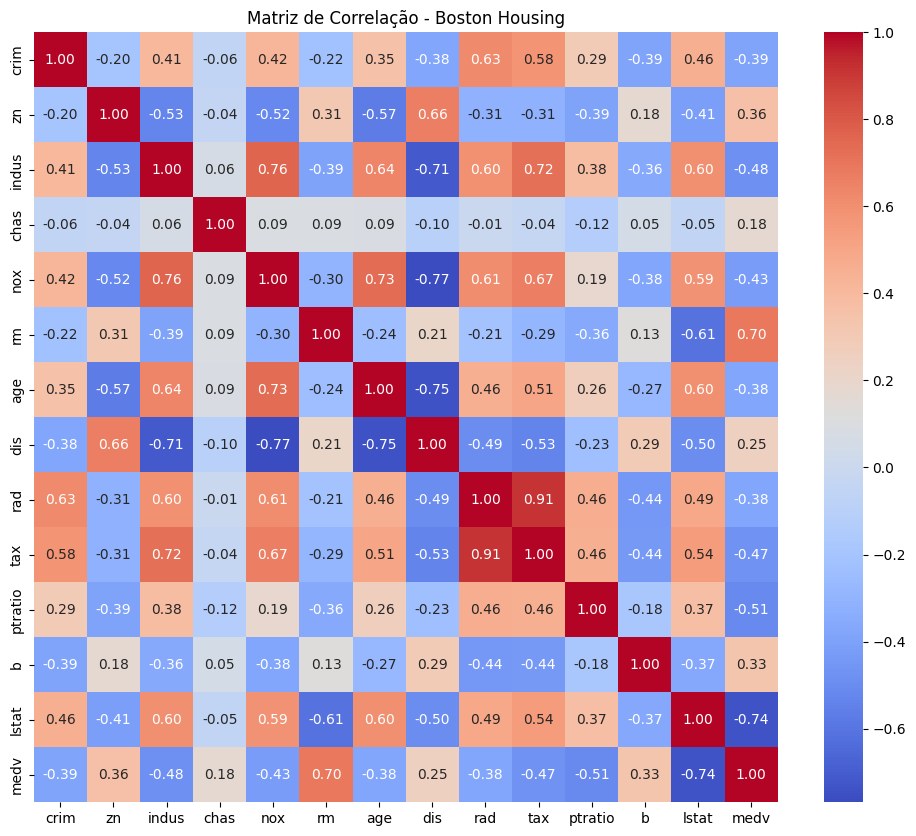

In [22]:
correlation_matrix = boston.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Boston Housing')
plt.show()

### 3. Separe os dados em validação e teste

In [26]:
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=0.2, random_state=42)

X_validation, X_test, y_validation, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Training Set:", X_train.shape, y_train.shape)
print("Validation Set:", X_validation.shape, y_validation.shape)
print("Test Set:", X_test.shape, y_test.shape)

Training Set: (404, 13) (404,)
Validation Set: (51, 13) (51,)
Test Set: (51, 13) (51,)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [28]:
depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
depth_8.fit(X_train, y_train)

depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
depth_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [32]:
predictions_train_depth_8 = depth_8.predict(X_train)
predictions_test_depth_8 = depth_8.predict(X_test)

mse_train_depth_8 = mean_squared_error(y_train, predictions_train_depth_8)
mse_test_depth_8 = mean_squared_error(y_test, predictions_test_depth_8)

predictions_train_depth_2 = depth_2.predict(X_train)
predictions_test_depth_2 = depth_2.predict(X_test)

mse_train_depth_2 = mean_squared_error(y_train, predictions_train_depth_2)
mse_test_depth_2 = mean_squared_error(y_test, predictions_test_depth_2)

print("MSE da árvore com profundidade máxima = 8:")
print(f"   - MSE para dados de treinamento: {mse_train_depth_8:.4f}")
print(f"   - MSE para dados de teste: {mse_test_depth_8:.4f}\n")

print("MSE da árvore com profundidade máxima = 2:")
print(f"   - MSE para dados de treinamento: {mse_train_depth_2:.4f}")
print(f"   - MSE para dados de teste: {mse_test_depth_2:.4f}")


MSE da árvore com profundidade máxima = 8:
   - MSE para dados de treinamento: 1.9490
   - MSE para dados de teste: 9.6429

MSE da árvore com profundidade máxima = 2:
   - MSE para dados de treinamento: 25.6546
   - MSE para dados de teste: 18.0771


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore com profundidade máxima = 8 tem um MSE menor nos dados de treinamento (1.9490) 
em comparação com a árvore de profundidade máxima = 2 (25.6546) e também tem um MSE menor
nos dados de teste (9.6429) em comparação com a árvore de profundidade máxima = 2 (18.0771). 

Portanto, a árvore com profundidade máxima = 8 parece ser mais adequada

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

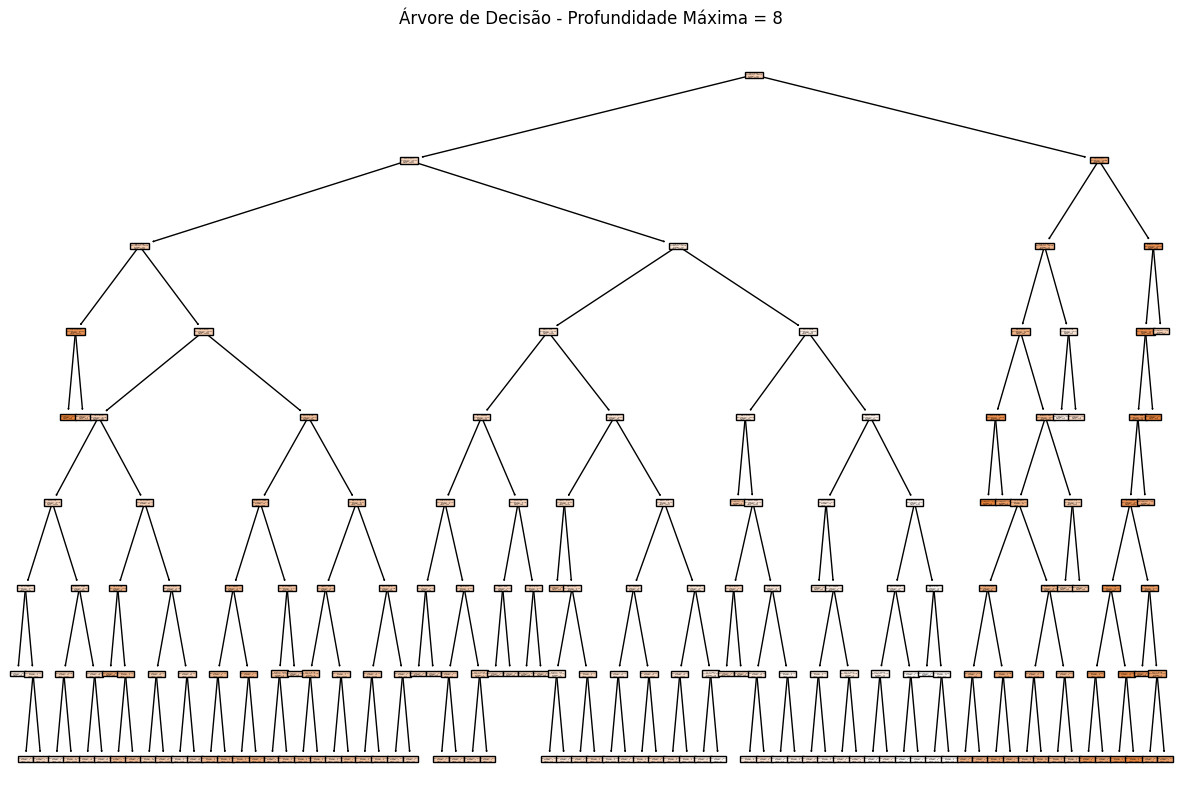

In [34]:
plt.figure(figsize=(15, 10))
plot_tree(tree_depth_8, feature_names=X.columns, filled=True)
plt.title('Árvore de Decisão - Profundidade Máxima = 8')
plt.show()

Me peracem mais importantes as raízes que trouxeram mais informacoes.